In [133]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Homework 7 - Dye Lasers

## Threshold power

In [134]:
pump_pow = 4  # W
pump_rad = 3e-2  # m
pump_wavelength = 514.5e-9  # m
focal_length = 3e-2  # m
dye_conc = 4e-4  # M
dye_thick = 0.2e-3  # m
out_wavelenth = 600e-9  # m
rho_cav_loss = 0.2  # dimless
tau_sing = 1e-8  # s
tau_vib = 1e-12  # s
reflectivity = 0.98  # dimless
absorbance = 0.0  # dimless
transmission = 1 - reflectivity - absorbance  # dimless
sigma_s = 1.25e-20  # m^2
sigma_p = 1.30e-20  # m^2

h = 6.626068e-34  # J s
c = 3e8  # m/s

rho = -np.log(reflectivity) + rho_cav_loss  # dimless
print(rho)

NA = 6.022e23  # avogadro, molecules/mol
number_density = dye_conc * NA * 1e3  # number/m^3

0.22020270731751948


In [135]:
threshold = rho * 1 / tau_sing / (dye_thick * number_density * sigma_s - rho)
print(threshold)
print(threshold * h * c / out_wavelenth)

57645096.32285636
1.9098016405089813e-11


## power vs. pump power

In [125]:
pump_pow = np.linspace(0, 0.6, 1000)  # W

n_out = transmission * (pump_pow * pump_wavelength / h / c *
                        (dye_thick * number_density * sigma_s - rho)
                        / rho / sigma_s - 1/tau_sing / sigma_s)

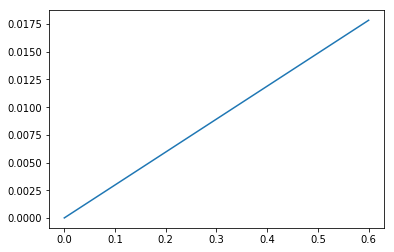

In [126]:
plt.plot(pump_pow, n_out * h * c / out_wavelenth * sigma_s)

In [129]:
pump_pow = 4  # W
n_out = transmission * (pump_pow * pump_wavelength / h / c *
                        (dye_thick * number_density * sigma_s - rho)
                        / rho / sigma_s - 1/tau_sing / sigma_s)
print(n_out * h * c / out_wavelenth * sigma_s)

0.11900405129936112


## Power vs. mirror reflectivity

In [131]:
reflectivity = np.linspace(0.5, 1, 1000)
transmission = 1 - reflectivity - absorbance  # dimless
rho = -np.log(reflectivity) + rho_cav_loss  # dimless
n_out = transmission * (pump_pow * pump_wavelength / h / c *
                        (dye_thick * number_density * sigma_s - rho)
                        / rho / sigma_s - 1/tau_sing / sigma_s)

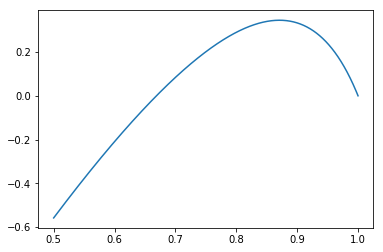

In [132]:
plt.plot(reflectivity, n_out * h * c / out_wavelenth * sigma_s)

In [122]:
reflectivity[np.argmax(n_out)]

0.8563563563563563

## Excited state absorption

Excited state absorption would scale with the output power, increasing the cavity loss term (not as fast as the gains, but still). Additionally, the number density would be a function of the triplet state population. A triplet state quencher would reduce the population of the triplet state, reducing it's number density, and therefore lowering the absorptive cavity losses. This would lower the threshold power, and increase the gain, causing less reflective mirrors to be optimum.